In [ ]:
# first we install and import pynvml. this Provides a Python interface to GPU management and monitoring functions.
pip install pynvml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 46 kB 2.8 MB/s 


In [ ]:
import pynvml

In [ ]:
## here we check that we have the necessary graphics card on the instance.
!nvidia-smi

Sat Aug  6 17:42:00 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# This gets the RAPIDS-Colab install files and tests the GPU. this is Run and the next cell only.
# output of this cell is read.  If the Colab Instance is not RAPIDS compatible, it will warn and give you remediation steps.
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/env-check.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 300, done.
remote: Counting objects: 100% (129/129), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 300 (delta 74), reused 99 (delta 55), pack-reused 171
Receiving objects: 100% (300/300), 87.58 KiB | 12.51 MiB/s, done.
Resolving deltas: 100% (136/136), done.
***********************************************************************
Woo! Your instance has the right kind of GPU, a Tesla T4!
***********************************************************************



In [ ]:
# This will update the Colab environment and restart the kernel. we dont run the next cell until we see the session crash.
!bash rapidsai-csp-utils/colab/update_gcc.sh
import os
os._exit(00)

Updating your Colab environment.  This will restart your kernel.  Don't Panic!
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [902 kB]
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:1

In [ ]:
# This will install CondaColab.  This will restart your kernel one last time.  Run this cell by itself and only run the next cell once you see the session crash.
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:40
🔁 Restarting kernel...


In [ ]:
# you can now run the rest of the cells as normal
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


In [ ]:
# Installing RAPIDS is now 'python rapidsai-csp-utils/colab/install_rapids.py <release> <packages>'
# The <release> options are 'stable' and 'nightly'.  Leaving it blank or adding any other words will default to stable.
!python rapidsai-csp-utils/colab/install_rapids.py stable
import os
os.environ['NUMBAPRO_NVVM'] = '/usr/local/cuda/nvvm/lib64/libnvvm.so'
os.environ['NUMBAPRO_LIBDEVICE'] = '/usr/local/cuda/nvvm/libdevice/'
os.environ['CONDA_PREFIX'] = '/usr/local'

Found existing installation: cffi 1.14.5
Uninstalling cffi-1.14.5:
  Successfully uninstalled cffi-1.14.5
Found existing installation: cryptography 3.4.5
Uninstalling cryptography-3.4.5:
  Successfully uninstalled cryptography-3.4.5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Installing RAPIDS Stable 21.12
Starting the RAPIDS install on Colab.  This will take about 15 minutes.
Solving environment: ...working... WARNING conda.core.solve:_add_specs(611): pinned spec cudatoolkit=11.1 conflicts with explicit specs.  Overriding pinned spec.
failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... WARNING conda.core.solve:_add_specs(611): pinned spec cudatoolkit=11.1 conflicts with explicit specs.  Overriding pinned spec.
failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... WARNING conda.core.solve:_add_specs(611): pinned spec c

In [ ]:
import cudf
import io, requests

# download CSV file from GitHub
url="https://github.com/plotly/datasets/raw/master/tips.csv"
content = requests.get(url).content.decode('utf-8')

# read CSV from memory
tips_df = cudf.read_csv(io.StringIO(content))
tips_df['tip_percentage'] = tips_df['tip']/tips_df['total_bill']*100

# display average tip by dining party size
print(tips_df.groupby('size').tip_percentage.mean())

size
6    15.622920
1    21.729202
4    14.594901
3    15.215685
2    16.571919
5    14.149549
Name: tip_percentage, dtype: float64


In [ ]:
import cuml

# Create and populate a GPU DataFrame
df_float = cudf.DataFrame()
df_float['0'] = [1.0, 2.0, 5.0]
df_float['1'] = [4.0, 2.0, 1.0]
df_float['2'] = [4.0, 2.0, 1.0]

# Setup and fit clusters
dbscan_float = cuml.DBSCAN(eps=1.0, min_samples=1)
dbscan_float.fit(df_float)

print(dbscan_float.labels_)

ModuleNotFoundError: ignored

In [ ]:
# import the necessary libraries for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from cuml.ensemble import RandomForestClassifier as cuRfc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [ ]:
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (12,6)

In [ ]:
data=pd.read_csv("phishing_dataset.csv")

In [ ]:
# In this phase we will convert float64 and int64 data to type 32, by doing this we can save the memory usage and we can prepare the data for using with CuML later for training purpose

As we can see the data has 10k rows and 50 columns including labels
float_cols = data.select_dtypes('float64').columns
for c in float_cols:
    data[c] = data[c].astype('float32')
    
int_cols = data.select_dtypes('int64').columns
for c in int_cols:
    data[c] = data[c].astype('int32')
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int32  
 1   NumDots                             10000 non-null  int32  
 2   SubdomainLevel                      10000 non-null  int32  
 3   PathLevel                           10000 non-null  int32  
 4   UrlLength                           10000 non-null  int32  
 5   NumDash                             10000 non-null  int32  
 6   NumDashInHostname                   10000 non-null  int32  
 7   AtSymbol                            10000 non-null  int32  
 8   TildeSymbol                         10000 non-null  int32  
 9   NumUnderscore                       10000 non-null  int32  
 10  NumPercent                          10000 non-null  int32  
 11  NumQueryComponents                  10000 

In [ ]:
data.rename(columns={'CLASS_LABEL': 'labels'}, inplace=True)

In [ ]:
# next looking at 5 random rows we can see that there is a mix of ranged data, some columns have a smaller range compared to others
data.sample(5)

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,labels
5500,5501,3,1,5,134,1,0,0,0,1,0,5,4,0,7,1,1,0,0,1,0,28,44,54,0,0,0,0.004566,0.562500,0,1,1,0,1,0.000000,0,0,0,0,0,1,0,0,1,-1,0,-1,0,1,0
8422,8423,2,0,2,57,0,0,0,0,2,0,1,0,0,2,1,0,0,0,1,0,15,29,5,0,0,0,0.000000,0.000000,0,0,0,0,0,0.000000,0,0,0,0,0,0,0,0,1,0,1,1,1,1,0
8481,8482,1,0,2,45,2,0,0,0,0,0,0,0,0,2,1,1,0,0,1,0,19,19,0,0,0,0,0.016393,0.918919,0,1,0,0,0,0.032787,0,0,0,0,0,0,0,0,1,1,-1,1,0,1,0
6163,6164,1,0,4,79,6,0,0,0,0,0,0,0,0,5,1,1,0,0,1,0,11,61,0,0,0,0,0.066667,0.256410,0,1,1,0,1,0.000000,0,0,0,0,1,0,0,0,1,-1,0,-1,0,1,0
5615,5616,3,1,3,79,4,0,0,0,0,0,0,0,0,6,1,1,0,0,0,0,26,46,0,0,0,0,0.448276,0.989362,0,0,0,1,0,0.034483,0,0,0,0,0,1,0,1,1,-1,-1,0,-1,0,0


In [ ]:
# By using the describe method, we can see some of the columns have high variance and some have smaller variance, this is due to the fact that some of the column have bigger values and bigger ranges
data.describe()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,labels
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.0,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,0.073800,0.458600,0.277200,0.002300,5.810300,0.988800,0.52520,0.017200,0.022200,0.428900,0.0,18.82430,35.564900,8.606500,0.000900,0.109300,0.057100,0.241334,0.392932,0.167200,0.844000,0.248700,0.1018,0.057600,0.136136,0.215300,0.005500,0.014000,0.004900,0.128800,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,2886.89568,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,0.622248,1.344793,1.117356,0.047906,9.617877,0.105241,0.49939,0.130023,0.147341,0.494944,0.0,8.11654,24.588502,24.313053,0.029988,0.368737,0.232045,0.342370,0.387292,0.373173,0.362873,0.432281,0.3024,0.232997,0.312413,0.411051,0.073961,0.117496,0.069832,0.334995,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.00000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,4.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2500.75000,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.0,14.00000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030303,0.000000,1.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,5000.50000,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.0,18.00000,30.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.247511,0.000000,1.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,7500.25000,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,1.00000,0.000000,0.000000,1.000000,0.0,22.00000,48.000000,0.000000,0.000000,0.000000,0.000000,0.315874,0.785714,0.000000,1.000000,0.000000,0.0000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000

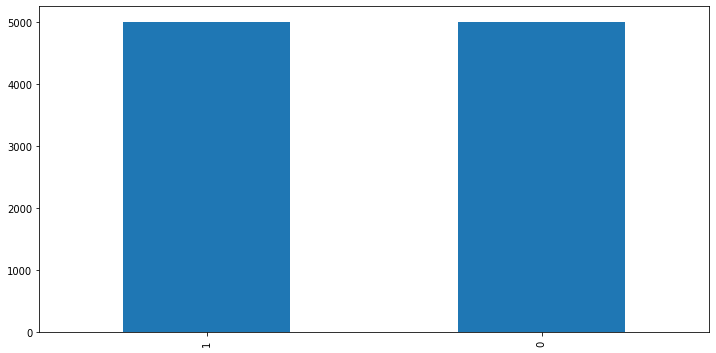

In [ ]:
# here we can see we have balanced data
data['labels'].value_counts().plot(kind='bar')

In [ ]:
# By looking the spearman correlation, we can find which features are linearly correlated in terms of predicting if a site is phising or not
def corr_heatmap(data, idx_s, idx_e):
    y = data['labels']
    temp = data.iloc[:, idx_s:idx_e]
    if 'id' in temp.columns:
        del temp['id']
    temp['labels'] = y
    sns.heatmap(temp.corr(), annot=True, fmt='.2f')
    plt.show()

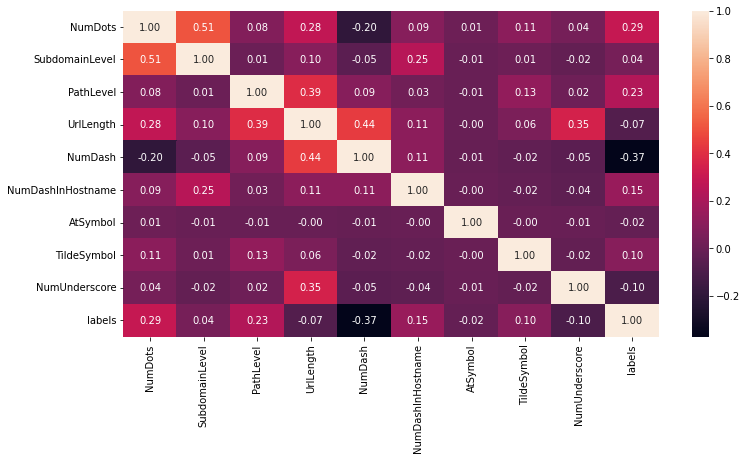

In [ ]:
corr_heatmap(data, 0, 10)

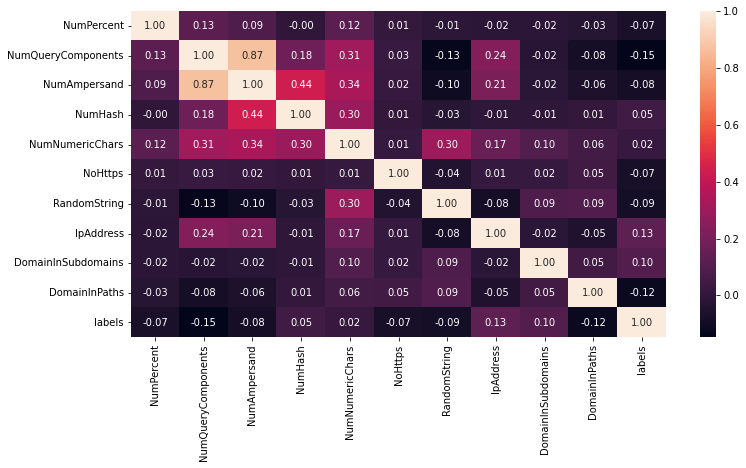

In [ ]:
corr_heatmap(data, 10, 20)

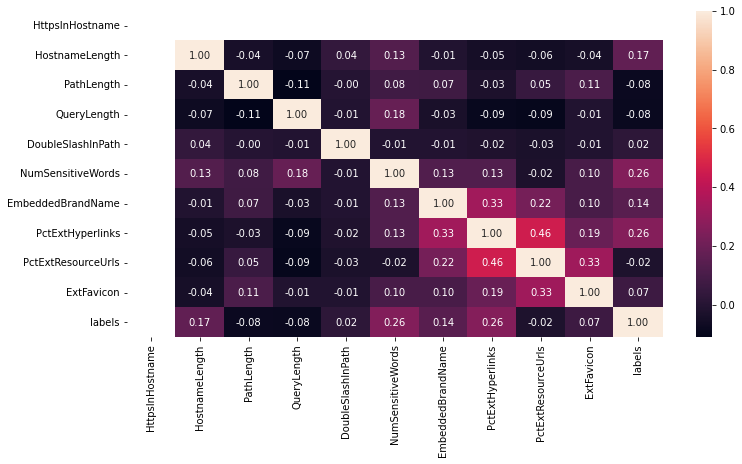

In [ ]:
corr_heatmap(data, 20, 30)

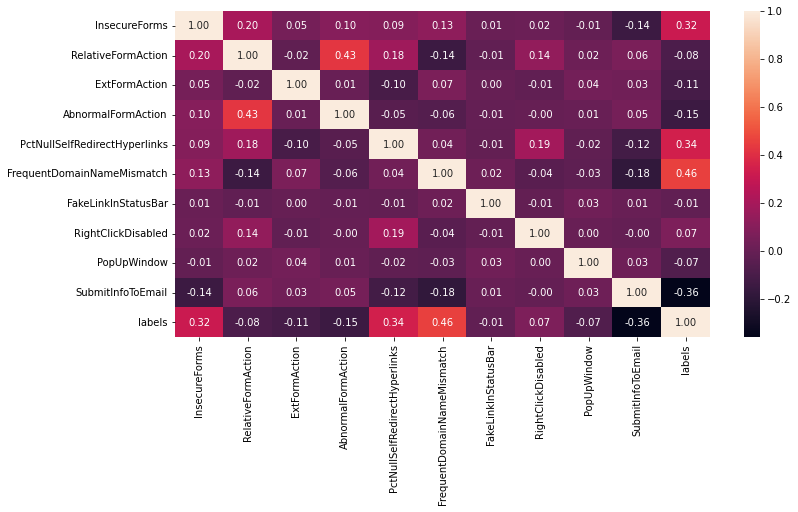

In [ ]:
corr_heatmap(data, 30, 40)

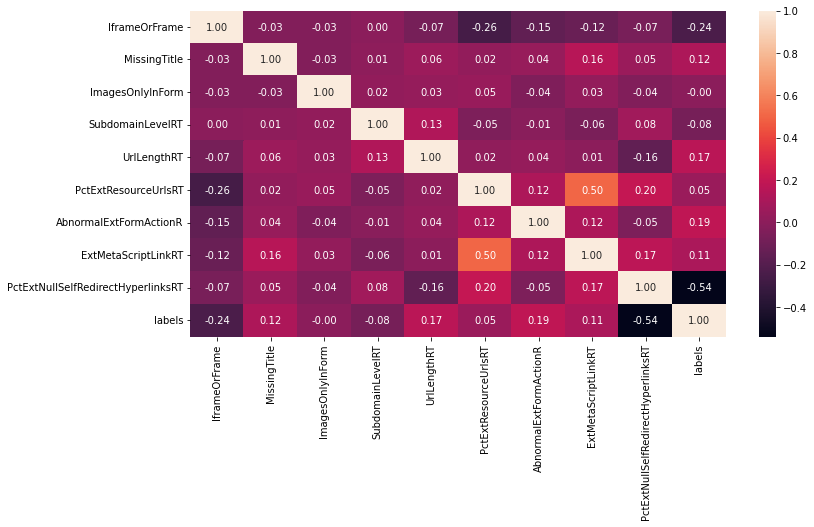

In [ ]:
corr_heatmap(data, 40, 50)

In [ ]:
# We will use mutual info classifier to find non linear and linear correlation betweem the features and labels
X = data.drop(['id', 'labels'], axis=1)
y = data['labels']

In [ ]:
discrete_features = X.dtypes == int

In [ ]:
# Here we process the scores and we can see that now mutual info is showing a bit different list from spearman correlation
mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
mi_scores = pd.Series(mi_scores, name='MI Scores', index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores

PctExtHyperlinks                      0.468778
PctExtResourceUrls                    0.295572
PctNullSelfRedirectHyperlinks         0.237267
PctExtNullSelfRedirectHyperlinksRT    0.214889
NumNumericChars                       0.133368
FrequentDomainNameMismatch            0.130551
ExtMetaScriptLinkRT                   0.111855
NumDash                               0.110252
SubmitInfoToEmail                     0.074530
PathLevel                             0.066814
NumDots                               0.065531
PathLength                            0.054676
InsecureForms                         0.052335
QueryLength                           0.048233
NumSensitiveWords                     0.042862
UrlLength                             0.037549
NumQueryComponents                    0.035363
PctExtResourceUrlsRT                  0.031984
IframeOrFrame                         0.025421
AbnormalExtFormActionR                0.019377
HostnameLength                        0.019164
NumUnderscore

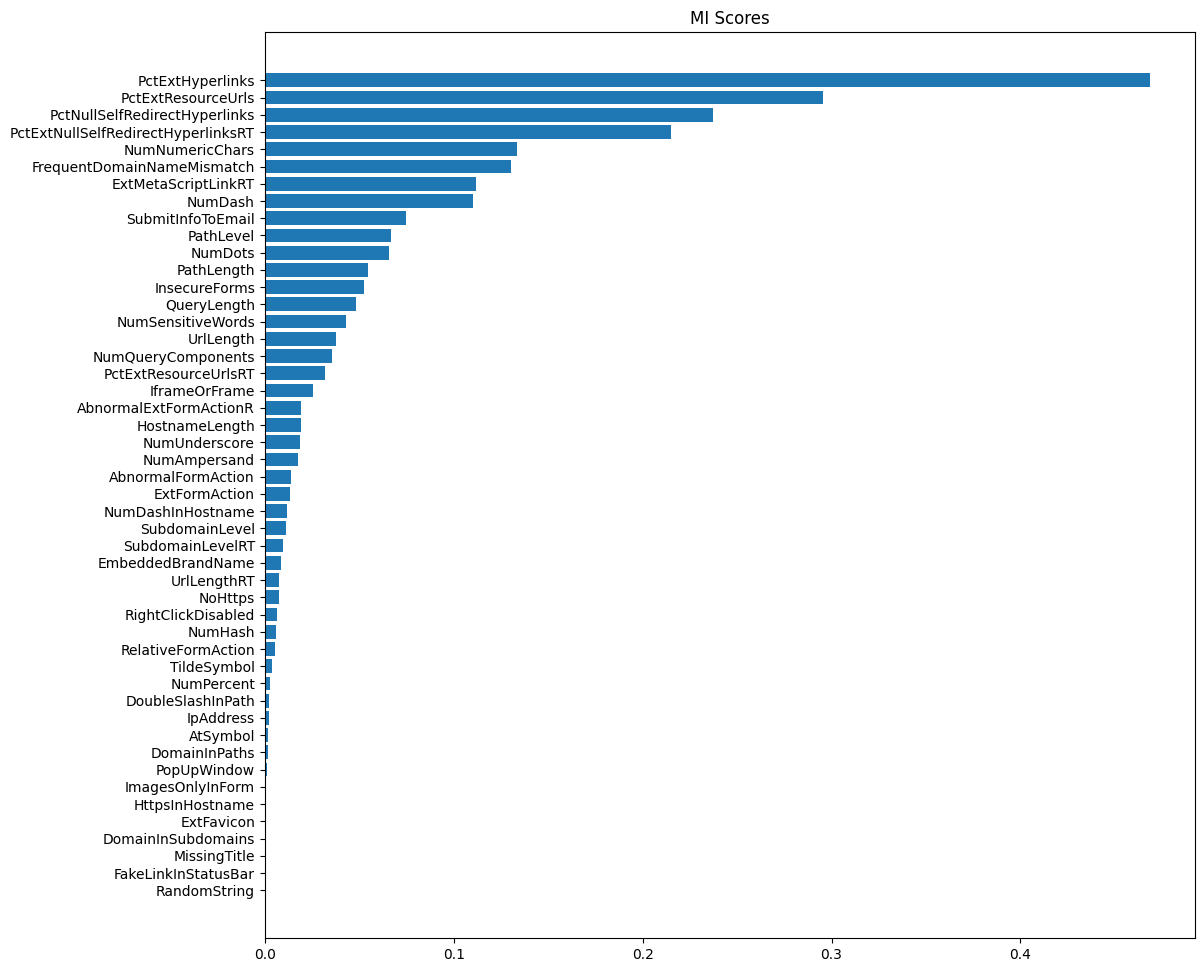

In [ ]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("MI Scores")
    
plt.figure(dpi=100, figsize=(12,12))
plot_mi_scores(mi_scores)

In [ ]:
# This method is to perform a repetative training process using logistic regression model, the purpose 
# for this is to find the optimal number of features that can be used to find the best fitted model without 
# adjusting much of the hyperparameters, hence the idea here is to go with Data-Centric training, basically the method 
# takes number of top N features to be used for training the model and all the evaluation metrics are returned for evaluation purpose
def train_rfc(data, top_n):
    top_n_features = mi_scores.sort_values(ascending=False).head(top_n).index.tolist()
    X = data[top_n_features]
    y = data['labels']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
    
    rfc = cuRfc(n_estimators=500, 
                split_criterion=1,  
                max_depth=32, 
                max_leaves=-1,
                max_features=1.0,
                n_bins=128)
    
    rfc.fit(X_train, y_train)
    
    y_pred = rfc.predict(X_test, predict_model='CPU')
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    return precision, recall, f1, accuracy

In [ ]:
# Here the loop will be starting from 20 as we will start training with top 20 features up to all 50 features to find optimal number of features needed for this problem
%%time
arr = []
for i in range(20,51,1):
    precision, recall, f1, accuracy = train_rfc(data, i)
    print("Performance for RFC Model with Top {} features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format(i, precision, recall, f1, accuracy))
    arr.append([i, precision, recall, f1, accuracy])

/usr/local/lib/python3.7/site-packages/cuml/internals/api_decorators.py:567: UserWarning: To use pickling or GPU-based prediction first train using float32 data to fit the estimator
  ret_val = func(*args, **kwargs)


Performance for RFC Model with Top 20 features is precision : 0.9794117647058823, recall : 0.9784524975514202, f1 score : 0.9789318961293484, accuracy : 0.9785


/usr/local/lib/python3.7/site-packages/cuml/internals/api_decorators.py:567: UserWarning: To use pickling or GPU-based prediction first train using float32 data to fit the estimator
  ret_val = func(*args, **kwargs)


Performance for RFC Model with Top 21 features is precision : 0.9754350051177073, recall : 0.9754350051177073, f1 score : 0.9754350051177073, accuracy : 0.976


/usr/local/lib/python3.7/site-packages/cuml/internals/api_decorators.py:567: UserWarning: To use pickling or GPU-based prediction first train using float32 data to fit the estimator
  ret_val = func(*args, **kwargs)


Performance for RFC Model with Top 22 features is precision : 0.9778672032193159, recall : 0.9838056680161943, f1 score : 0.9808274470232089, accuracy : 0.981


/usr/local/lib/python3.7/site-packages/cuml/internals/api_decorators.py:567: UserWarning: To use pickling or GPU-based prediction first train using float32 data to fit the estimator
  ret_val = func(*args, **kwargs)


Performance for RFC Model with Top 23 features is precision : 0.9734251968503937, recall : 0.9792079207920792, f1 score : 0.9763079960513327, accuracy : 0.976


/usr/local/lib/python3.7/site-packages/cuml/internals/api_decorators.py:567: UserWarning: To use pickling or GPU-based prediction first train using float32 data to fit the estimator
  ret_val = func(*args, **kwargs)


Performance for RFC Model with Top 24 features is precision : 0.9817258883248731, recall : 0.9817258883248731, f1 score : 0.9817258883248731, accuracy : 0.982


/usr/local/lib/python3.7/site-packages/cuml/internals/api_decorators.py:567: UserWarning: To use pickling or GPU-based prediction first train using float32 data to fit the estimator
  ret_val = func(*args, **kwargs)


Performance for RFC Model with Top 25 features is precision : 0.9848484848484849, recall : 0.9828629032258065, f1 score : 0.9838546922300706, accuracy : 0.984


/usr/local/lib/python3.7/site-packages/cuml/internals/api_decorators.py:567: UserWarning: To use pickling or GPU-based prediction first train using float32 data to fit the estimator
  ret_val = func(*args, **kwargs)


Performance for RFC Model with Top 26 features is precision : 0.9785992217898832, recall : 0.9805068226120858, f1 score : 0.979552093476144, accuracy : 0.979


/usr/local/lib/python3.7/site-packages/cuml/internals/api_decorators.py:567: UserWarning: To use pickling or GPU-based prediction first train using float32 data to fit the estimator
  ret_val = func(*args, **kwargs)


Performance for RFC Model with Top 27 features is precision : 0.9851694915254238, recall : 0.9851694915254238, f1 score : 0.9851694915254238, accuracy : 0.986


/usr/local/lib/python3.7/site-packages/cuml/internals/api_decorators.py:567: UserWarning: To use pickling or GPU-based prediction first train using float32 data to fit the estimator
  ret_val = func(*args, **kwargs)


Performance for RFC Model with Top 28 features is precision : 0.9701789264413518, recall : 0.9828801611278952, f1 score : 0.976488244122061, accuracy : 0.9765


/usr/local/lib/python3.7/site-packages/cuml/internals/api_decorators.py:567: UserWarning: To use pickling or GPU-based prediction first train using float32 data to fit the estimator
  ret_val = func(*args, **kwargs)


Performance for RFC Model with Top 29 features is precision : 0.9878172588832488, recall : 0.9769076305220884, f1 score : 0.9823321554770318, accuracy : 0.9825


/usr/local/lib/python3.7/site-packages/cuml/internals/api_decorators.py:567: UserWarning: To use pickling or GPU-based prediction first train using float32 data to fit the estimator
  ret_val = func(*args, **kwargs)


Performance for RFC Model with Top 30 features is precision : 0.9775171065493646, recall : 0.9794319294809011, f1 score : 0.9784735812133073, accuracy : 0.978


/usr/local/lib/python3.7/site-packages/cuml/internals/api_decorators.py:567: UserWarning: To use pickling or GPU-based prediction first train using float32 data to fit the estimator
  ret_val = func(*args, **kwargs)


Performance for RFC Model with Top 31 features is precision : 0.9782178217821782, recall : 0.9821073558648111, f1 score : 0.9801587301587302, accuracy : 0.98


/usr/local/lib/python3.7/site-packages/cuml/internals/api_decorators.py:567: UserWarning: To use pickling or GPU-based prediction first train using float32 data to fit the estimator
  ret_val = func(*args, **kwargs)


Performance for RFC Model with Top 32 features is precision : 0.9736585365853658, recall : 0.9765166340508806, f1 score : 0.975085490962384, accuracy : 0.9745


/usr/local/lib/python3.7/site-packages/cuml/internals/api_decorators.py:567: UserWarning: To use pickling or GPU-based prediction first train using float32 data to fit the estimator
  ret_val = func(*args, **kwargs)


Performance for RFC Model with Top 33 features is precision : 0.9705304518664047, recall : 0.9801587301587301, f1 score : 0.9753208292201382, accuracy : 0.975


/usr/local/lib/python3.7/site-packages/cuml/internals/api_decorators.py:567: UserWarning: To use pickling or GPU-based prediction first train using float32 data to fit the estimator
  ret_val = func(*args, **kwargs)


Performance for RFC Model with Top 34 features is precision : 0.9726443768996961, recall : 0.9726443768996961, f1 score : 0.9726443768996961, accuracy : 0.973


/usr/local/lib/python3.7/site-packages/cuml/internals/api_decorators.py:567: UserWarning: To use pickling or GPU-based prediction first train using float32 data to fit the estimator
  ret_val = func(*args, **kwargs)


Performance for RFC Model with Top 35 features is precision : 0.973, recall : 0.9798590130916415, f1 score : 0.9764174611138986, accuracy : 0.9765


/usr/local/lib/python3.7/site-packages/cuml/internals/api_decorators.py:567: UserWarning: To use pickling or GPU-based prediction first train using float32 data to fit the estimator
  ret_val = func(*args, **kwargs)


Performance for RFC Model with Top 36 features is precision : 0.9723926380368099, recall : 0.9814241486068112, f1 score : 0.9768875192604005, accuracy : 0.9775


/usr/local/lib/python3.7/site-packages/cuml/internals/api_decorators.py:567: UserWarning: To use pickling or GPU-based prediction first train using float32 data to fit the estimator
  ret_val = func(*args, **kwargs)


Performance for RFC Model with Top 37 features is precision : 0.9730807577268196, recall : 0.9769769769769769, f1 score : 0.975024975024975, accuracy : 0.975


/usr/local/lib/python3.7/site-packages/cuml/internals/api_decorators.py:567: UserWarning: To use pickling or GPU-based prediction first train using float32 data to fit the estimator
  ret_val = func(*args, **kwargs)


Performance for RFC Model with Top 38 features is precision : 0.979, recall : 0.9819458375125376, f1 score : 0.9804707060590886, accuracy : 0.9805


/usr/local/lib/python3.7/site-packages/cuml/internals/api_decorators.py:567: UserWarning: To use pickling or GPU-based prediction first train using float32 data to fit the estimator
  ret_val = func(*args, **kwargs)


Performance for RFC Model with Top 39 features is precision : 0.9872549019607844, recall : 0.9776699029126213, f1 score : 0.982439024390244, accuracy : 0.982


/usr/local/lib/python3.7/site-packages/cuml/internals/api_decorators.py:567: UserWarning: To use pickling or GPU-based prediction first train using float32 data to fit the estimator
  ret_val = func(*args, **kwargs)


Performance for RFC Model with Top 40 features is precision : 0.9782833505687694, recall : 0.986444212721585, f1 score : 0.9823468328141226, accuracy : 0.983


/usr/local/lib/python3.7/site-packages/cuml/internals/api_decorators.py:567: UserWarning: To use pickling or GPU-based prediction first train using float32 data to fit the estimator
  ret_val = func(*args, **kwargs)


Performance for RFC Model with Top 41 features is precision : 0.9728915662650602, recall : 0.9709418837675351, f1 score : 0.9719157472417251, accuracy : 0.972


/usr/local/lib/python3.7/site-packages/cuml/internals/api_decorators.py:567: UserWarning: To use pickling or GPU-based prediction first train using float32 data to fit the estimator
  ret_val = func(*args, **kwargs)


Performance for RFC Model with Top 42 features is precision : 0.9798792756539235, recall : 0.978894472361809, f1 score : 0.97938662644545, accuracy : 0.9795


/usr/local/lib/python3.7/site-packages/cuml/internals/api_decorators.py:567: UserWarning: To use pickling or GPU-based prediction first train using float32 data to fit the estimator
  ret_val = func(*args, **kwargs)


Performance for RFC Model with Top 43 features is precision : 0.9836065573770492, recall : 0.9798270893371758, f1 score : 0.9817131857555341, accuracy : 0.981


/usr/local/lib/python3.7/site-packages/cuml/internals/api_decorators.py:567: UserWarning: To use pickling or GPU-based prediction first train using float32 data to fit the estimator
  ret_val = func(*args, **kwargs)


Performance for RFC Model with Top 44 features is precision : 0.9744597249508841, recall : 0.9821782178217822, f1 score : 0.9783037475345168, accuracy : 0.978


/usr/local/lib/python3.7/site-packages/cuml/internals/api_decorators.py:567: UserWarning: To use pickling or GPU-based prediction first train using float32 data to fit the estimator
  ret_val = func(*args, **kwargs)


Performance for RFC Model with Top 45 features is precision : 0.9805725971370143, recall : 0.9825819672131147, f1 score : 0.9815762538382804, accuracy : 0.982


/usr/local/lib/python3.7/site-packages/cuml/internals/api_decorators.py:567: UserWarning: To use pickling or GPU-based prediction first train using float32 data to fit the estimator
  ret_val = func(*args, **kwargs)


Performance for RFC Model with Top 46 features is precision : 0.9828456104944501, recall : 0.978894472361809, f1 score : 0.9808660624370594, accuracy : 0.981


/usr/local/lib/python3.7/site-packages/cuml/internals/api_decorators.py:567: UserWarning: To use pickling or GPU-based prediction first train using float32 data to fit the estimator
  ret_val = func(*args, **kwargs)


Performance for RFC Model with Top 47 features is precision : 0.9769539078156313, recall : 0.9779338014042126, f1 score : 0.9774436090225563, accuracy : 0.9775


/usr/local/lib/python3.7/site-packages/cuml/internals/api_decorators.py:567: UserWarning: To use pickling or GPU-based prediction first train using float32 data to fit the estimator
  ret_val = func(*args, **kwargs)


Performance for RFC Model with Top 48 features is precision : 0.9778449144008057, recall : 0.9729458917835672, f1 score : 0.9753892516323456, accuracy : 0.9755


/usr/local/lib/python3.7/site-packages/cuml/internals/api_decorators.py:567: UserWarning: To use pickling or GPU-based prediction first train using float32 data to fit the estimator
  ret_val = func(*args, **kwargs)


Performance for RFC Model with Top 49 features is precision : 0.9730250481695568, recall : 0.986328125, f1 score : 0.9796314258001939, accuracy : 0.979


/usr/local/lib/python3.7/site-packages/cuml/internals/api_decorators.py:567: UserWarning: To use pickling or GPU-based prediction first train using float32 data to fit the estimator
  ret_val = func(*args, **kwargs)


Performance for RFC Model with Top 50 features is precision : 0.9729458917835672, recall : 0.9758793969849247, f1 score : 0.9744104365278474, accuracy : 0.9745
CPU times: user 2min 37s, sys: 21.4 s, total: 2min 58s
Wall time: 2min 2s


In [ ]:
df = pd.DataFrame(arr, columns=['num_of_features', 'precision', 'recall', 'f1_score', 'accuracy'])
df.head()

,num_of_features,precision,recall,f1_score,accuracy
0,20,0.979412,0.978452,0.978932,0.9785
1,21,0.975435,0.975435,0.975435,0.9760
2,22,0.977867,0.983806,0.980827,0.9810
3,23,0.973425,0.979208,0.976308,0.9760
4,24,0.981726,0.981726,0.981726,0.9820


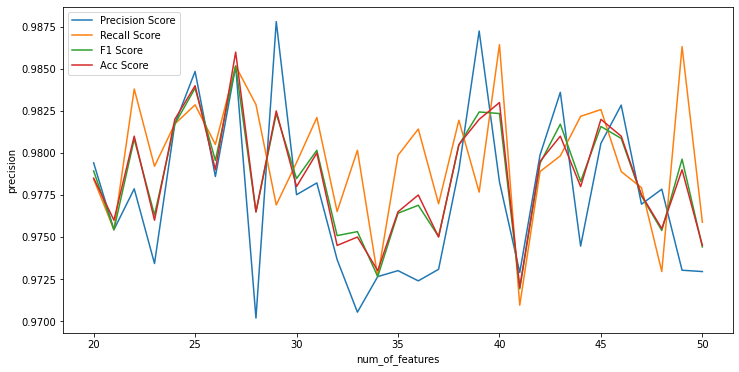

In [ ]:
# here we visualise the above in a grpahical manner
sns.lineplot(x='num_of_features', y='precision', data=df, label='Precision Score')
sns.lineplot(x='num_of_features', y='recall', data=df, label='Recall Score')
sns.lineplot(x='num_of_features', y='f1_score', data=df, label='F1 Score')
sns.lineplot(x='num_of_features', y='accuracy', data=df, label='Acc Score')

In [ ]:
top_n_features = mi_scores.sort_values(ascending=False).head(32).index.tolist()
X = data[top_n_features]
y = data['labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

rfc = cuRfc(n_estimators=500, 
            split_criterion=1,  
            max_depth=32, 
            max_leaves=-1,
            max_features=1.0,
            n_bins=128)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test, predict_model='CPU')

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Performance for RFC Model with Top {} features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format(27, precision, recall, f1, accuracy))

/usr/local/lib/python3.7/site-packages/cuml/internals/api_decorators.py:567: UserWarning: To use pickling or GPU-based prediction first train using float32 data to fit the estimator
  ret_val = func(*args, **kwargs)


Performance for RFC Model with Top 27 features is precision : 0.98046875, recall : 0.9719264278799613, f1 score : 0.9761789013125912, accuracy : 0.9755


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       967
           1       0.98      0.97      0.98      1033

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



In [ ]:
def train_logistic(data, top_n):
    top_n_features = mi_scores.sort_values(ascending=False).head(top_n).index.tolist()
    X = data[top_n_features]
    y = data['labels']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
    
    lr = LogisticRegression(max_iter=10000)
    lr.fit(X_train, y_train)
    
    y_pred = lr.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    return precision, recall, f1, accuracy

In [ ]:
%%time
arr = []
for i in range(20,51,1):
    precision, recall, f1, accuracy = train_logistic(data, i)
    print("Performance for Logistic Model with Top {} features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format(i, precision, recall, f1, accuracy))
    arr.append([i, precision, recall, f1, accuracy])

Performance for Logistic Model with Top 20 features is precision : 0.9251893939393939, recall : 0.9467054263565892, f1 score : 0.935823754789272, accuracy : 0.933
Performance for Logistic Model with Top 21 features is precision : 0.9295908658420552, recall : 0.9367209971236817, f1 score : 0.933142311365807, accuracy : 0.93
Performance for Logistic Model with Top 22 features is precision : 0.9273631840796019, recall : 0.9357429718875502, f1 score : 0.9315342328835581, accuracy : 0.9315
Performance for Logistic Model with Top 23 features is precision : 0.9212121212121213, recall : 0.9287169042769857, f1 score : 0.9249492900608519, accuracy : 0.926
Performance for Logistic Model with Top 24 features is precision : 0.9153225806451613, recall : 0.9331963001027749, f1 score : 0.9241730279898218, accuracy : 0.9255
Performance for Logistic Model with Top 25 features is precision : 0.9292730844793713, recall : 0.9412935323383085, f1 score : 0.935244686109738, accuracy : 0.9345
Performance for L

In [ ]:
df = pd.DataFrame(arr, columns=['num_of_features', 'precision', 'recall', 'f1_score', 'accuracy'])
df

,num_of_features,precision,recall,f1_score,accuracy
0,20,0.925189,0.946705,0.935824,0.9330
1,21,0.929591,0.936721,0.933142,0.9300
2,22,0.927363,0.935743,0.931534,0.9315
3,23,0.921212,0.928717,0.924949,0.9260
4,24,0.915323,0.933196,0.924173,0.9255
5,25,0.929273,0.941294,0.935245,0.9345
6,26,0.914286,0.931727,0.922924,0.9225
7,27,0.933602,0.947906,0.940699,0.9415
8,28,0.923001,0.935936,0.929423,0.9290
9,29,0.919231,0.950298,0.934506,0.9330


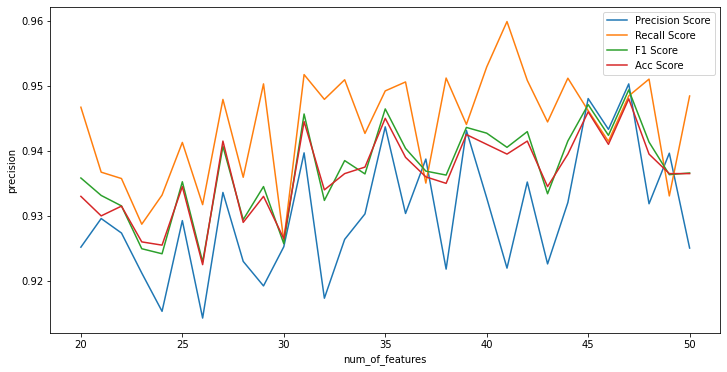

In [ ]:
sns.lineplot(x='num_of_features', y='precision', data=df, label='Precision Score')
sns.lineplot(x='num_of_features', y='recall', data=df, label='Recall Score')
sns.lineplot(x='num_of_features', y='f1_score', data=df, label='F1 Score')
sns.lineplot(x='num_of_features', y='accuracy', data=df, label='Acc Score')

In [ ]:
def train_naive_bayes(data, top_n):
    top_n_features = mi_scores.sort_values(ascending=False).head(top_n).index.tolist()
    X = data[top_n_features]
    y = data['labels']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
    
    classifier = GaussianNB()
    classifier.fit(X_train, y_train)
    
    y_pred = classifier.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    return precision, recall, f1, accuracy

In [ ]:
%%time
arr = []
for i in range(20,51,1):
    precision, recall, f1, accuracy = train_naive_bayes(data, i)
    print("Performance for Naive Bayes Model with Top {} features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format(i, precision, recall, f1, accuracy))
    arr.append([i, precision, recall, f1, accuracy])

Performance for Naive Bayes Model with Top 20 features is precision : 0.9243902439024391, recall : 0.7534791252485089, f1 score : 0.8302300109529025, accuracy : 0.845
Performance for Naive Bayes Model with Top 21 features is precision : 0.9409547738693468, recall : 0.7372047244094488, f1 score : 0.8267108167770421, accuracy : 0.843
Performance for Naive Bayes Model with Top 22 features is precision : 0.9314214463840399, recall : 0.7432835820895523, f1 score : 0.8267847260653016, accuracy : 0.8435
Performance for Naive Bayes Model with Top 23 features is precision : 0.9294403892944039, recall : 0.7655310621242485, f1 score : 0.8395604395604395, accuracy : 0.854
Performance for Naive Bayes Model with Top 24 features is precision : 0.9158767772511849, recall : 0.76007866273353, f1 score : 0.830736163353036, accuracy : 0.8425
Performance for Naive Bayes Model with Top 25 features is precision : 0.9191438763376932, recall : 0.773, f1 score : 0.8397609994568169, accuracy : 0.8525
Performance

In [ ]:
df = pd.DataFrame(arr, columns=['num_of_features', 'precision', 'recall', 'f1_score', 'accuracy'])
df

,num_of_features,precision,recall,f1_score,accuracy
0,20,0.924390,0.753479,0.830230,0.8450
1,21,0.940955,0.737205,0.826711,0.8430
2,22,0.931421,0.743284,0.826785,0.8435
3,23,0.929440,0.765531,0.839560,0.8540
4,24,0.915877,0.760079,0.830736,0.8425
5,25,0.919144,0.773000,0.839761,0.8525
6,26,0.916763,0.772904,0.838710,0.8475
7,27,0.922535,0.782090,0.846527,0.8575
8,28,0.916452,0.725331,0.809767,0.8325
9,29,0.921117,0.747783,0.825449,0.8395


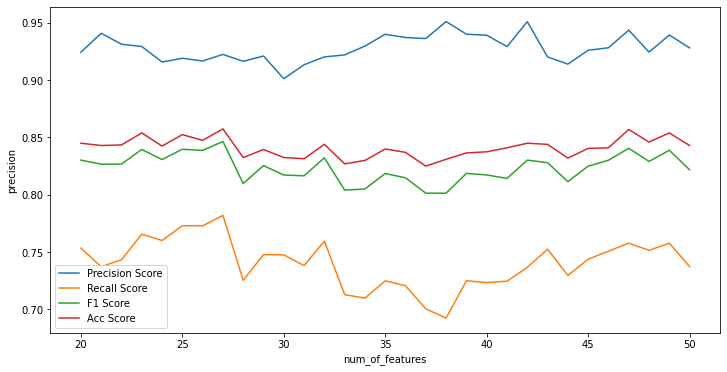

In [ ]:
sns.lineplot(x='num_of_features', y='precision', data=df, label='Precision Score')
sns.lineplot(x='num_of_features', y='recall', data=df, label='Recall Score')
sns.lineplot(x='num_of_features', y='f1_score', data=df, label='F1 Score')
sns.lineplot(x='num_of_features', y='accuracy', data=df, label='Acc Score')

In [ ]:
def train_KNN(data, top_n):
    top_n_features = mi_scores.sort_values(ascending=False).head(top_n).index.tolist()
    X = data[top_n_features]
    y = data['labels']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
    
    classifier = KNeighborsClassifier()
    classifier.fit(X_train, y_train)
    
    y_pred = classifier.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    return precision, recall, f1, accuracy

In [ ]:
%%time
arr = []
for i in range(20,51,1):
    precision, recall, f1, accuracy = train_KNN(data, i)
    print("Performance for KNN Model with Top {} features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format(i, precision, recall, f1, accuracy))
    arr.append([i, precision, recall, f1, accuracy])

Performance for KNN Model with Top 20 features is precision : 0.8613678373382625, recall : 0.9200394866732478, f1 score : 0.8897374701670645, accuracy : 0.8845
Performance for KNN Model with Top 21 features is precision : 0.8336431226765799, recall : 0.8943170488534397, f1 score : 0.862914862914863, accuracy : 0.8575
Performance for KNN Model with Top 22 features is precision : 0.8503861003861004, recall : 0.8935091277890467, f1 score : 0.871414441147379, accuracy : 0.87
Performance for KNN Model with Top 23 features is precision : 0.867579908675799, recall : 0.9134615384615384, f1 score : 0.8899297423887588, accuracy : 0.8825
Performance for KNN Model with Top 24 features is precision : 0.8318756073858115, recall : 0.8898128898128899, f1 score : 0.8598694123556003, accuracy : 0.8605
Performance for KNN Model with Top 25 features is precision : 0.839517625231911, recall : 0.9104627766599598, f1 score : 0.8735521235521236, accuracy : 0.869
Performance for KNN Model with Top 26 features 

In [ ]:
df = pd.DataFrame(arr, columns=['num_of_features', 'precision', 'recall', 'f1_score', 'accuracy'])
df

,num_of_features,precision,recall,f1_score,accuracy
0,20,0.861368,0.920039,0.889737,0.8845
1,21,0.833643,0.894317,0.862915,0.8575
2,22,0.850386,0.893509,0.871414,0.8700
3,23,0.867580,0.913462,0.889930,0.8825
4,24,0.831876,0.889813,0.859869,0.8605
5,25,0.839518,0.910463,0.873552,0.8690
6,26,0.835708,0.897959,0.865716,0.8635
7,27,0.839738,0.901408,0.869481,0.8655
8,28,0.842717,0.922701,0.880897,0.8725
9,29,0.845794,0.906814,0.875242,0.8710


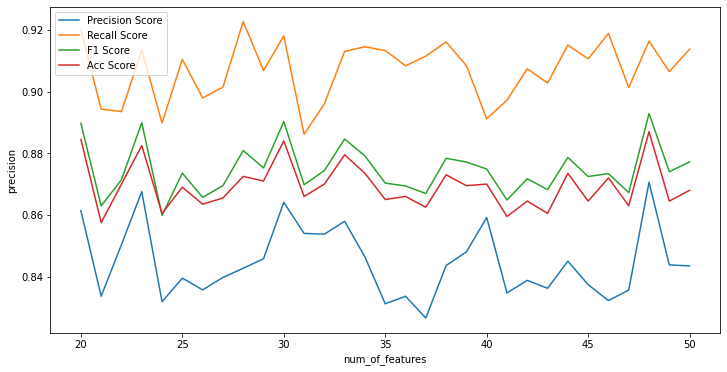

In [ ]:
sns.lineplot(x='num_of_features', y='precision', data=df, label='Precision Score')
sns.lineplot(x='num_of_features', y='recall', data=df, label='Recall Score')
sns.lineplot(x='num_of_features', y='f1_score', data=df, label='F1 Score')
sns.lineplot(x='num_of_features', y='accuracy', data=df, label='Acc Score')

In [ ]:
def train_DT(data, top_n):
    top_n_features = mi_scores.sort_values(ascending=False).head(top_n).index.tolist()
    X = data[top_n_features]
    y = data['labels']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
    
    classifier = DecisionTreeClassifier()
    classifier.fit(X_train, y_train)
    
    y_pred = classifier.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    return precision, recall, f1, accuracy

In [ ]:
%%time
arr = []
for i in range(20,51,1):
    precision, recall, f1, accuracy = train_DT(data, i)
    print("Performance for Decision Tree Model with Top {} features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format(i, precision, recall, f1, accuracy))
    arr.append([i, precision, recall, f1, accuracy])

Performance for Decision Tree Model with Top 20 features is precision : 0.9608040201005025, recall : 0.9685916919959473, f1 score : 0.9646821392532795, accuracy : 0.965
Performance for Decision Tree Model with Top 21 features is precision : 0.9663461538461539, recall : 0.9672762271414822, f1 score : 0.9668109668109668, accuracy : 0.9655
Performance for Decision Tree Model with Top 22 features is precision : 0.9653465346534653, recall : 0.9634387351778656, f1 score : 0.9643916913946586, accuracy : 0.964
Performance for Decision Tree Model with Top 23 features is precision : 0.9521072796934866, recall : 0.9678675754625121, f1 score : 0.9599227426364075, accuracy : 0.9585
Performance for Decision Tree Model with Top 24 features is precision : 0.959349593495935, recall : 0.9682051282051282, f1 score : 0.9637570188871872, accuracy : 0.9645
Performance for Decision Tree Model with Top 25 features is precision : 0.9561830574488802, recall : 0.9693978282329714, f1 score : 0.9627450980392158, a

In [ ]:
df = pd.DataFrame(arr, columns=['num_of_features', 'precision', 'recall', 'f1_score', 'accuracy'])
df

,num_of_features,precision,recall,f1_score,accuracy
0,20,0.960804,0.968592,0.964682,0.9650
1,21,0.966346,0.967276,0.966811,0.9655
2,22,0.965347,0.963439,0.964392,0.9640
3,23,0.952107,0.967868,0.959923,0.9585
4,24,0.959350,0.968205,0.963757,0.9645
5,25,0.956183,0.969398,0.962745,0.9620
6,26,0.958418,0.962322,0.960366,0.9610
7,27,0.962500,0.965284,0.963890,0.9625
8,28,0.952987,0.966236,0.959566,0.9590
9,29,0.958877,0.956000,0.957436,0.9575


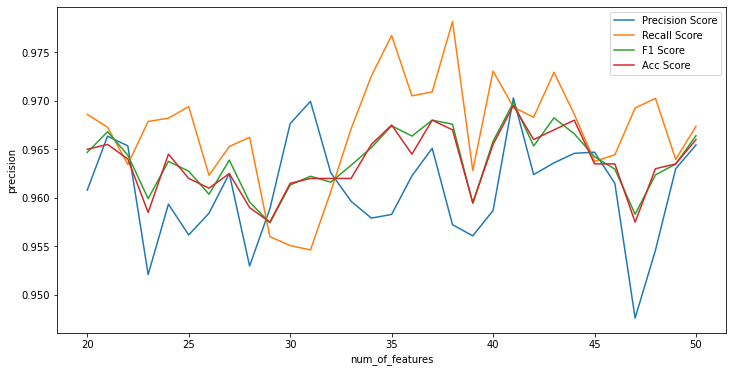

In [ ]:
sns.lineplot(x='num_of_features', y='precision', data=df, label='Precision Score')
sns.lineplot(x='num_of_features', y='recall', data=df, label='Recall Score')
sns.lineplot(x='num_of_features', y='f1_score', data=df, label='F1 Score')
sns.lineplot(x='num_of_features', y='accuracy', data=df, label='Acc Score')

In [ ]:
def XGBoost(data, top_n):
    top_n_features = mi_scores.sort_values(ascending=False).head(top_n).index.tolist()
    X = data[top_n_features]
    y = data['labels']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
    
    classifier = XGBClassifier(learning_rate=0.4, max_depth=7)
    classifier.fit(X_train, y_train)
    
    y_pred = classifier.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    return precision, recall, f1, accuracy

In [ ]:
%%time
arr = []
for i in range(20,51,1):
    precision, recall, f1, accuracy = XGBoost(data, i)
    print("Performance for XGBoost Model with Top {} features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format(i, precision, recall, f1, accuracy))
    arr.append([i, precision, recall, f1, accuracy])

/usr/local/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:21:22] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1639022671260/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Performance for XGBoost Model with Top 20 features is precision : 0.971201588877855, recall : 0.9868819374369324, f1 score : 0.9789789789789789, accuracy : 0.979
[18:21:24] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1639022671260/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Performance for XGBoost Model with Top 21 features is precision : 0.9752577319587629, recall : 0.9854166666666667, f1 score : 0.9803108808290156, accuracy : 0.981
[18:21:25] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1639022671260/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Performance for XGBoost Model with Top 22 features is precision : 0.9754901960784313, recall : 0.983201581027668, f1 score : 0.9793307086614172, accuracy : 0.979
[18:21:26] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1639022671260/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Performance for XGBoost Model with Top 23 features is precision : 0.9842209072978304, recall : 0.9851924975320829, f1 score : 0.9847064627528367, accuracy : 0.9845
[18:21:28] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1639022671260/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Performance for XGBoost Model with Top 24 features is precision : 0.9820538384845464, recall : 0.9899497487437185, f1 score : 0.9859859859859859, accuracy : 0.986
[18:21:29] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1639022671260/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Performance for XGBoost Model with Top 25 features is precision : 0.9800796812749004, recall : 0.9879518072289156, f1 score : 0.984, accuracy : 0.984
[18:21:30] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1639022671260/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Performance for XGBoost Model with Top 26 features is precision : 0.9806122448979592, recall : 0.9846311475409836, f1 score : 0.9826175869120655, accuracy : 0.983
[18:21:31] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1639022671260/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Performance for XGBoost Model with Top 27 features is precision : 0.978328173374613, recall : 0.9793388429752066, f1 score : 0.9788332472896231, accuracy : 0.9795
[18:21:32] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1639022671260/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Performance for XGBoost Model with Top 28 features is precision : 0.9813471502590674, recall : 0.9823651452282157, f1 score : 0.9818558838776568, accuracy : 0.9825


/usr/local/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:21:34] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1639022671260/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Performance for XGBoost Model with Top 29 features is precision : 0.9889112903225806, recall : 0.9849397590361446, f1 score : 0.9869215291750503, accuracy : 0.987
[18:21:35] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1639022671260/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Performance for XGBoost Model with Top 30 features is precision : 0.9859154929577465, recall : 0.9859154929577465, f1 score : 0.9859154929577465, accuracy : 0.986
[18:21:37] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1639022671260/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Performance for XGBoost Model with Top 31 features is precision : 0.9811507936507936, recall : 0.9860418743768694, f1 score : 0.9835902536051715, accuracy : 0.9835
[18:21:38] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1639022671260/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Performance for XGBoost Model with Top 32 features is precision : 0.9842053307008884, recall : 0.9861523244312562, f1 score : 0.9851778656126482, accuracy : 0.985
[18:21:39] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1639022671260/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Performance for XGBoost Model with Top 33 features is precision : 0.9807692307692307, recall : 0.983756345177665, f1 score : 0.9822605169792196, accuracy : 0.9825
[18:21:41] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1639022671260/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Performance for XGBoost Model with Top 34 features is precision : 0.9824922760041195, recall : 0.9824922760041195, f1 score : 0.9824922760041195, accuracy : 0.983
[18:21:42] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1639022671260/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Performance for XGBoost Model with Top 35 features is precision : 0.9848942598187311, recall : 0.9829145728643216, f1 score : 0.9839034205231388, accuracy : 0.984
[18:21:43] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1639022671260/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Performance for XGBoost Model with Top 36 features is precision : 0.9847560975609756, recall : 0.9857578840284842, f1 score : 0.9852567361464158, accuracy : 0.9855
[18:21:46] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1639022671260/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Performance for XGBoost Model with Top 37 features is precision : 0.9898373983739838, recall : 0.973026973026973, f1 score : 0.981360201511335, accuracy : 0.9815
[18:21:47] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1639022671260/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Performance for XGBoost Model with Top 38 features is precision : 0.9818913480885312, recall : 0.9888551165146909, f1 score : 0.9853609288238262, accuracy : 0.9855
[18:21:49] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1639022671260/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Performance for XGBoost Model with Top 39 features is precision : 0.99079754601227, recall : 0.9847560975609756, f1 score : 0.9877675840978594, accuracy : 0.988
[18:21:50] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1639022671260/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Performance for XGBoost Model with Top 40 features is precision : 0.9841269841269841, recall : 0.9880478087649402, f1 score : 0.9860834990059641, accuracy : 0.986
[18:21:52] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1639022671260/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Performance for XGBoost Model with Top 41 features is precision : 0.9889669007021064, recall : 0.9899598393574297, f1 score : 0.9894631209232313, accuracy : 0.9895
[18:21:53] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1639022671260/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Performance for XGBoost Model with Top 42 features is precision : 0.9866939611054247, recall : 0.9856850715746421, f1 score : 0.9861892583120204, accuracy : 0.9865
[18:21:56] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1639022671260/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Performance for XGBoost Model with Top 43 features is precision : 0.9784394250513347, recall : 0.9865424430641822, f1 score : 0.9824742268041237, accuracy : 0.983
[18:21:57] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1639022671260/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Performance for XGBoost Model with Top 44 features is precision : 0.9829488465396189, recall : 0.9919028340080972, f1 score : 0.9874055415617129, accuracy : 0.9875
[18:21:59] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1639022671260/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Performance for XGBoost Model with Top 45 features is precision : 0.980980980980981, recall : 0.98, f1 score : 0.9804902451225612, accuracy : 0.9805
[18:22:01] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1639022671260/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Performance for XGBoost Model with Top 46 features is precision : 0.980788675429727, recall : 0.9938524590163934, f1 score : 0.9872773536895674, accuracy : 0.9875
[18:22:02] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1639022671260/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Performance for XGBoost Model with Top 47 features is precision : 0.9865255052935515, recall : 0.9903381642512077, f1 score : 0.9884281581485054, accuracy : 0.988
[18:22:04] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1639022671260/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Performance for XGBoost Model with Top 48 features is precision : 0.9839195979899498, recall : 0.9888888888888889, f1 score : 0.98639798488665, accuracy : 0.9865
[18:22:07] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1639022671260/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Performance for XGBoost Model with Top 49 features is precision : 0.9851485148514851, recall : 0.9861248761149654, f1 score : 0.9856364536899456, accuracy : 0.9855
[18:22:08] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1639022671260/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Performance for XGBoost Model with Top 50 features is precision : 0.9901380670611439, recall : 0.9911154985192497, f1 score : 0.9906265416872224, accuracy : 0.9905
CPU times: user 1min 28s, sys: 70.9 ms, total: 1min 28s
Wall time: 48.3 s


In [ ]:
df = pd.DataFrame(arr, columns=['num_of_features', 'precision', 'recall', 'f1_score', 'accuracy'])
df

,num_of_features,precision,recall,f1_score,accuracy
0,20,0.971202,0.986882,0.978979,0.9790
1,21,0.975258,0.985417,0.980311,0.9810
2,22,0.975490,0.983202,0.979331,0.9790
3,23,0.984221,0.985192,0.984706,0.9845
4,24,0.982054,0.989950,0.985986,0.9860
5,25,0.980080,0.987952,0.984000,0.9840
6,26,0.980612,0.984631,0.982618,0.9830
7,27,0.978328,0.979339,0.978833,0.9795
8,28,0.981347,0.982365,0.981856,0.9825
9,29,0.988911,0.984940,0.986922,0.9870


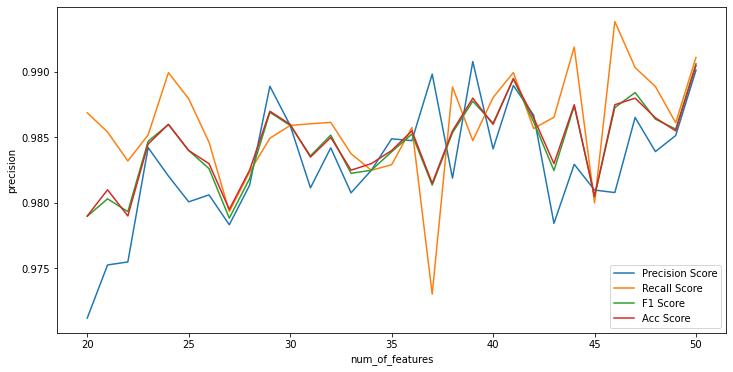

In [ ]:
sns.lineplot(x='num_of_features', y='precision', data=df, label='Precision Score')
sns.lineplot(x='num_of_features', y='recall', data=df, label='Recall Score')
sns.lineplot(x='num_of_features', y='f1_score', data=df, label='F1 Score')
sns.lineplot(x='num_of_features', y='accuracy', data=df, label='Acc Score')